## 3. Ví dụ với Python
### Ví dụ với dữ liệu 1 chiều
Quay trở lại với ví dụ nêu ở phần Giới thiệu. Trước tiên ta cần khai báo vài thư viện và tạo dữ liệu:

In [182]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extened data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

### Các hàm cần thiết cho logistic sigmoid regression

In [15]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
#         it += 1
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-9.44046141]
 [ 2.24323998]
 [ 1.41397747]]


### Với kết quả tìm được, đầu ra \\(y\\) có thể được dự đoán theo công thức: `y = sigmoid(-4.1 + 1.537*x)`. Với dữ liệu trong tập training, kết quả là:

In [184]:
print(sigmoid(np.dot(w[-1].T, X)))

[[ 0.03501592  0.05078108  0.07310642  0.10416972  0.14634799  0.20175793
   0.20175793  0.27147534  0.35458234  0.4475032   0.54424128  0.63775242
   0.72188183  0.79282004  0.89267823  0.92460236  0.94758783  0.96384008
   0.97518471  0.9884283 ]]


Biểu diễn kết quả này trên đồ thị ta có:

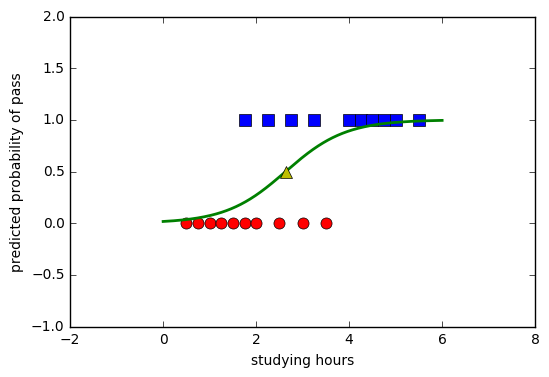

In [185]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.savefig('lg_results.png', bbox_inches='tight', dpi = 300)
plt.show()

Nếu như chỉ có hai output là 'fail' hoặc 'pass', điểm trên đồ thị của hàm sigmoid tương ứng với xác suất 0.5 được chọn làm _hard threshold_ (ngưỡng cứng). Việc này có thể chứng minh khá dễ dàng (tôi sẽ bàn ở phần dưới). 

### Ví dụ với dữ liệu 2 chiều

In [19]:
X0

array([[ 1.92306918,  0.775673  ],
       [ 2.90509186,  1.7997662 ],
       [ 1.58909188,  1.16143907],
       [ 2.76874122,  1.07663514],
       [ 2.52416203,  1.53020387],
       [ 2.02414192,  1.80692632],
       [ 2.49174878,  2.62943405],
       [ 1.11439322,  2.88348991],
       [ 2.62561276,  2.89077234],
       [ 3.27183166,  0.75454543],
       [ 3.55617919,  0.66250438],
       [ 1.45945603,  2.28222634],
       [ 2.87575608,  2.52637908],
       [ 2.30375703,  2.46497356],
       [ 1.08925412,  2.01982447],
       [ 4.09096119, -0.08330889],
       [ 1.80350003,  1.91837255],
       [ 1.25827634,  1.8856175 ],
       [ 2.08532169,  1.79005729],
       [ 1.9340609 ,  1.09208652]])

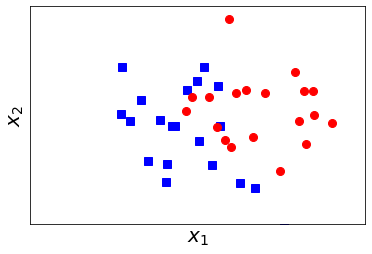

In [11]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [13]:
print(X0.shape)

(20, 2)


In [16]:
X = np.concatenate((X0, X1), axis = 0).T   #axis = 0 Them theo hang
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T     #axis = 1 Them theo cot
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

eta = .05 
d = X.shape[0]      #So dong = 3
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
print(w[-1])

[[-9.4456423 ]
 [ 2.19336346]
 [ 1.39962908]]


array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.92306918,  2.90509186,  1.58909188,  2.76874122,  2.52416203,
         2.02414192,  2.49174878,  1.11439322,  2.62561276,  3.27183166,
         3.55617919,  1.45945603,  2.87575608,  2.30375703,  1.08925412,
         4.09096119,  1.80350003,  1.25827634,  2.08532169,  1.9340609 ,
         4.49775285,  3.07311718,  3.52528933,  2.39091046,  3.12302646,
         4.62359547,  3.38696098,  4.36167918,  3.

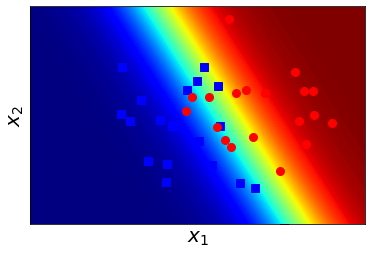

In [31]:
# Make data.
xm = np.arange(-1, 6, 0.025)
xlen = len(xm)
ym = np.arange(0, 4, 0.025)
ylen = len(ym)
xm, ym = np.meshgrid(xm, ym)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
zm = sigmoid(w0 + w1*xm + w2*ym)

CS = plt.contourf(xm, ym, zm, 200, cmap='jet')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()

In [28]:
xm

array([[-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975],
       [-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975],
       [-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975],
       ...,
       [-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975],
       [-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975],
       [-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975]])

In [29]:
ym

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.025, 0.025, 0.025, ..., 0.025, 0.025, 0.025],
       [0.05 , 0.05 , 0.05 , ..., 0.05 , 0.05 , 0.05 ],
       ...,
       [3.925, 3.925, 3.925, ..., 3.925, 3.925, 3.925],
       [3.95 , 3.95 , 3.95 , ..., 3.95 , 3.95 , 3.95 ],
       [3.975, 3.975, 3.975, ..., 3.975, 3.975, 3.975]])